In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Sphere(X, C):
    """Sphere function to evaluate candidates."""
    fun = np.zeros(C)
    for i in range(C):
        fun[i] = np.sum(X[i, :] ** 2)
    return fun

class CIOptimizer:
    def __init__(self, objective_function, C=7, var=2, UB=5.12, LB=-5.12, R=0.97, max_iter=200):
        self.C = C  # Number of candidates
        self.var = var  # Number of variables per candidate
        self.UB = UB  # Upper Bound
        self.LB = LB  # Lower Bound
        self.R = R  # Reduction Factor
        self.max_iter = max_iter  # Maximum iterations
        self.X = self.generate_random_matrix(self.C, self.var, self.LB, self.UB)
        self.function = objective_function
        self.history = []

    def generate_random_matrix(self, rows, cols, lower_bound, upper_bound):
        return np.random.uniform(lower_bound, upper_bound, (rows, cols))

    def optimize(self):
        for _ in range(self.max_iter):
            fun = self.function(self.X, self.C) 
            #fun = np.where(fun > 0, fun, fun + 1e-6)  # Element-wise fix
            self.history.append(fun)
            
            # Probability Calculation (Inverse Fitness)
            
            prob = (1 / fun) / np.sum(1 / fun)

            # Roulette Wheel Selection
            cumsum = np.cumsum(prob)
            g_ran = np.random.random(self.C)
            arr = []
            for i in range(len(g_ran)):
                for j,k in enumerate(cumsum):
                    if g_ran[i] >= k:
                        arr.append(j)
                        break
            X_up = self.X[arr]
            # Compute New Range
            original_range = self.UB - self.LB
            new_range = original_range * self.R
            new_LB, new_UB = -(new_range / 2), (new_range / 2)

            # Compute New Bounds
            New_Bounds_LB = np.zeros([self.C, 2])
            New_Bounds_UB = np.zeros([self.C, 2])
            for i in range(len(X_up)):
                for j in range(self.var):
                    New_Bounds_LB[i,j] = max(X_up[i,j] + new_LB, self.LB)
                    New_Bounds_UB[i,j] = min(X_up[i,j] + new_UB,self.UB)
            # Generate New Candidates
            X_new = np.array([
                [np.random.uniform(lb[0], ub[0]), np.random.uniform(lb[1], ub[1])]
                for lb, ub in zip(New_Bounds_LB, New_Bounds_UB)
            ])
            self.X = X_new

        return self.history


opt = CIOptimizer(Sphere)
l = opt.optimize()
l

C:\Users\Nihar\AppData\Local\Temp\ipykernel_3856\3835274873.py:34: RuntimeWarning: divide by zero encountered in divide
  prob = (1 / fun) / np.sum(1 / fun)
C:\Users\Nihar\AppData\Local\Temp\ipykernel_3856\3835274873.py:34: RuntimeWarning: invalid value encountered in divide
  prob = (1 / fun) / np.sum(1 / fun)


[array([25.78318095, 10.83194601, 29.90849385, 29.43583548, 26.451818  ,
        20.33918317, 25.89246045]),
 array([13.25828395,  3.8351857 , 32.85062905, 19.94307058, 11.84577507,
         3.51200439, 26.07346763]),
 array([ 2.85394531,  7.02944535,  6.11167856, 21.46898996, 20.74884814,
         0.        ,  0.        ]),
 array([23.96858104,  8.41808429,  7.18704273, 11.77134279, 23.18121824,
        15.83176443, 18.76722102]),
 array([ 3.33377603, 15.66884539, 22.72262699,  0.31330744, 12.20425907,
         7.42383249,  2.56172569]),
 array([22.32686792, 24.2370647 , 19.07180351, 23.88498673, 15.14189665,
         5.00633736,  0.        ]),
 array([30.95276112, 24.19444698,  3.46436244, 21.88863047,  7.27641903,
        24.56277539,  4.83198519]),
 array([ 3.43646926,  6.52411566,  0.85299285, 12.87268765,  1.52167124,
        25.35721097,  7.47041819]),
 array([29.37228926,  2.50436735, 19.49292549,  0.91164718,  0.45283575,
        10.09919378,  0.        ]),
 array([ 0.9572948 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


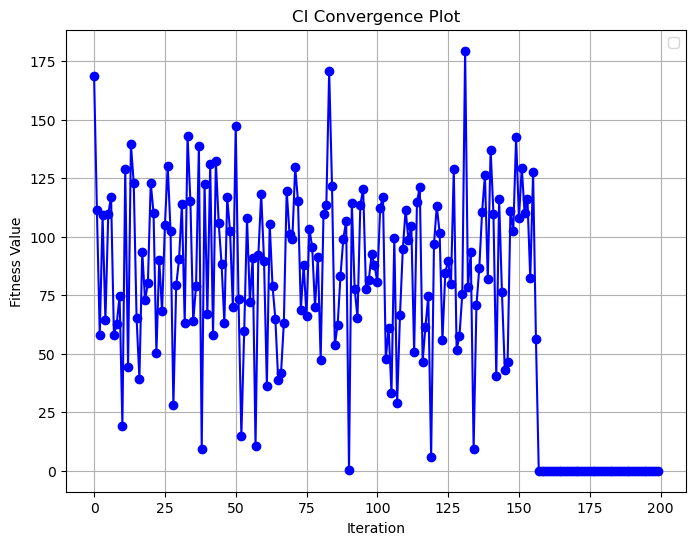

In [2]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(200),[np.sum(i) for i in l], marker='o', linestyle='-', color='b')
plt.xlabel("Iteration")
plt.ylabel("Fitness Value")
plt.title("CI Convergence Plot")
plt.legend()
plt.grid()
plt.show()